<a href="https://colab.research.google.com/github/MasahiroAraki/SpeechRecognition/blob/master/Python/chap05a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5章 解答例

In [1]:
# mlxtendパッケージを最新(0.20.0)に更新
!pip install -U mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 15.3 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


## 例題5.1

最小二乗法の解析的手法をPythonでコーディングせよ．ただし、教科書の例題から教師信号を下記コードのように変更（クラス1が1、クラス2が-1）して実行するので、求まる重みは異なる(p.65の注釈参照)。

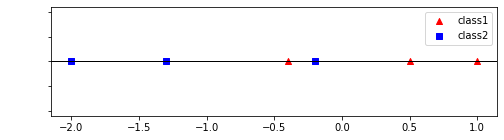

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[1.0], [0.5], [-0.2], [-0.4], [-1.3], [-2.0]])
y = np.array([1, 1, -1, 1, -1, -1])

plt.figure(figsize=(8,2))
plt.yticks(color="None")
plt.axhline(y=0, linewidth=1, c='black')
plt.scatter(X[y==1], np.zeros(len(X[y==1])), c='red', marker='^', label='class1')
plt.scatter(X[y==-1], np.zeros(len(X[y==-1])), c='blue', marker='s', label='class2')
plt.legend(loc='upper right')

(n, d) = X.shape
X2 = np.concatenate((np.ones((n, 1)), X), axis=1)

解析的手法による解法のコードを記述せよ。

In [3]:
w = np.linalg.inv(X2.T @ X2) @ X2.T @ y
print(f'result: {w}')

result: [0.29773463 0.74433657]


[numpy.linalg.lstsq](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html) 最小二乗法を実行する関数を用いた別解を記述せよ。

In [4]:
w2 = np.linalg.lstsq(X2, y, rcond=None)[0]  # rcond=Noneは警告を消すため
print(f'result: {w2}')

result: [0.29773463 0.74433657]


w[0]+w[1]*x = 0 、すなわち -w[0]/w[1] = -0.4 という識別境界が得られた。

## 例題5.3

Widrow-Hoffの学習規則を Python でコーディングせよ．

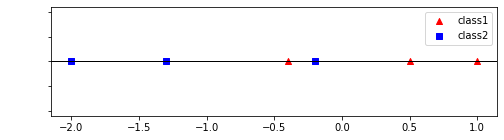

In [6]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[1.0], [0.5], [-0.2], [-0.4], [-1.3], [-2.0]])
y = np.array([1, 1, -1, 1, -1, -1])

plt.figure(figsize=(8,2))
plt.yticks(color="None")
plt.axhline(y=0, linewidth=1, c='black')
plt.scatter(X[y==1], np.zeros(len(X[y==1])), c='red', marker='^', label='class1')
plt.scatter(X[y==-1], np.zeros(len(X[y==-1])), c='blue', marker='s', label='class2')
plt.legend(loc='upper right')

(n, d) = X.shape
X2 = np.concatenate((np.ones((n, 1)), X), axis=1)

eps = 1e-8
differ = np.inf
olderr = np.inf
w = np.array([0.2, 0.3])
rho = 0.2
(n, d) = X.shape
X2 = np.concatenate((np.ones((n, 1)), X), axis=1)

Widrow-Hoffの学習規則を記述せよ。

In [7]:
while differ > eps:
    g = X2 @ w - y
    w = w - rho * np.sum(g * X2.T, axis=1)
    sqrerr = 0.5 * np.sum(g**2)
    differ = np.abs(olderr - sqrerr)
    olderr = sqrerr
    print(f'w = {w}')

w = [0.104  0.8876]
w = [0.405248  0.5900272]
w = [0.20216346 0.8619874 ]
w = [0.37332126 0.64810785]
w = [0.23642752 0.82180404]
w = [0.34718044 0.68175308]
w = [0.25780539 0.79485629]
w = [0.32996994 0.70354809]
w = [0.2717091  0.77726699]
w = [0.31874634 0.7177501 ]
w = [0.28077078 0.7658012 ]
w = [0.31143042 0.72700706]
w = [0.2866773  0.75832758]
w = [0.30666178 0.7330409 ]
w = [0.29052728 0.75345615]
w = [0.3035535  0.73697386]
w = [0.29303675 0.75028086]
w = [0.30152746 0.73953743]
w = [0.29467247 0.74821116]
w = [0.30020686 0.74120841]
w = [0.29573866 0.74686209]
w = [0.29934607 0.74229758]
w = [0.29643363 0.74598275]
w = [0.29878499 0.74300752]
w = [0.29688661 0.74540958]
w = [0.29841927 0.74347027]
w = [0.29718188 0.74503597]
w = [0.29818089 0.7437719 ]
w = [0.29737434 0.74479245]
w = [0.29802551 0.74396851]
w = [0.29749978 0.74463372]
w = [0.29792423 0.74409666]
w = [0.29758155 0.74453026]
w = [0.29785821 0.74418019]
w = [0.29763485 0.74446282]
w = [0.29781518 0.74423464]
w 

### 機械学習ライブラリ scikit-learn を利用した勾配降下法のコード

乱数で生成した線形分離不可能な2クラスのデータに対して、勾配降下法 [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)を用いて二乗誤差最小の識別面を求め、mlxtendによって識別面を表示せよ。

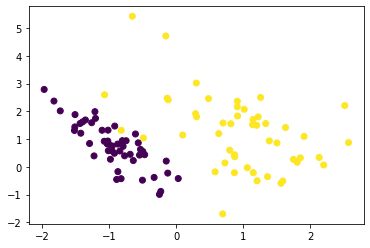

In [8]:
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X, y = make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=2)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

SGDClassifierの学習と識別面の表示を行うコードを記述せよ。

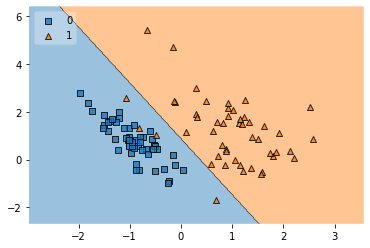

In [9]:
clf = SGDClassifier(loss='squared_error', eta0=0.01, learning_rate="constant", penalty=None)
clf.fit(X, y)
plot_decision_regions(X=X, y=y, clf=clf, legend=2)